<a href="https://colab.research.google.com/github/mp308/DeepLeraning/blob/main/SP_RomaniaMapProgrammingAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
city_list = ['Arad','Bucharest','Craiova','Dobreta','Eforie','Fagaras',
 'Giurgiu','Hirsova','Iasi','Lugoj','Mehadia','Neamt','Oradea','Pitesti',
 'Rimnicu_Vilcea','Sibiu','Timisoara','Urziceni','Vaslui','Zerind']

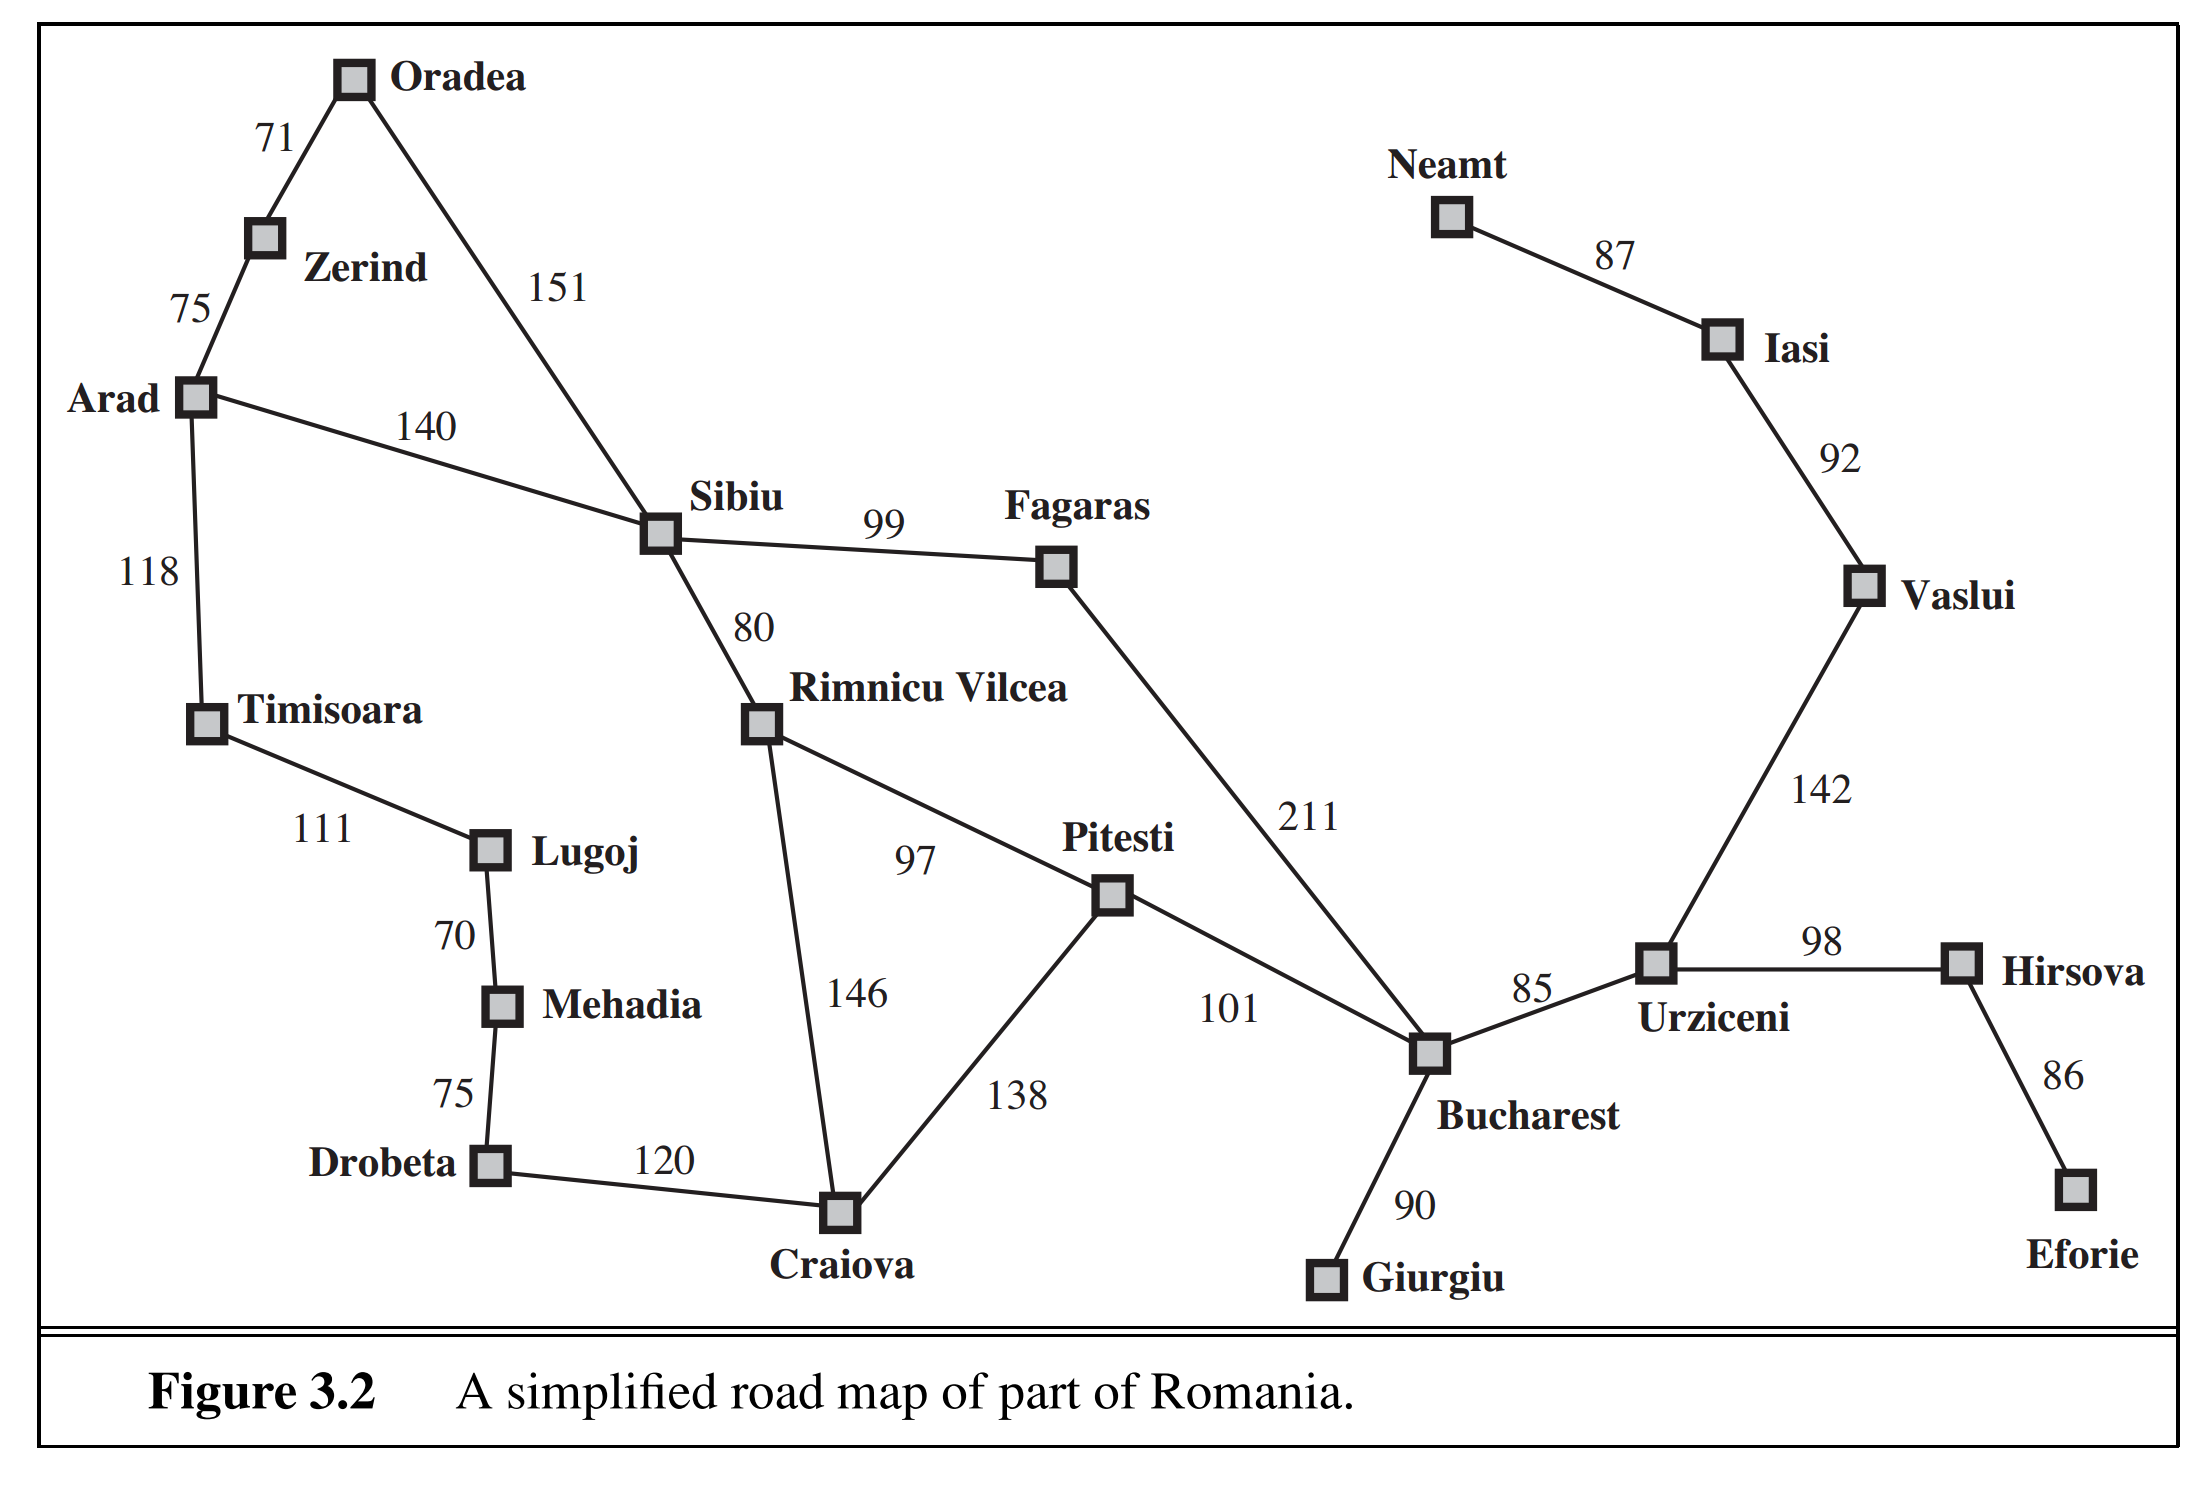![image.png](
  
)

In [ ]:
city_locations = {'Arad': (29, 192),
 'Bucharest': (268, 55),
 'Craiova': (163, 22),
 'Dobreta': (91, 32),
 'Eforie': (420, 28),
 'Fagaras': (208, 157),
 'Giurgiu': (264, 8),
 'Hirsova': (396, 74),
 'Iasi': (347, 204),
 'Lugoj': (91, 98),
 'Mehadia': (93, 65),
 'Neamt': (290, 229),
 'Oradea': (62, 258),
 'Pitesti': (220, 88),
 'Rimnicu_Vilcea': (147, 124),
 'Sibiu': (126, 164),
 'Timisoara': (32, 124),
 'Urziceni': (333, 74),
 'Vaslui': (376, 153),
 'Zerind': (44, 225)}

In [ ]:
city_graphs = {'Arad': {'Sibiu': 140, 'Timisoara': 118, 'Zerind': 75},
 'Bucharest': {'Fagaras': 211, 'Giurgiu': 90, 'Pitesti': 101, 'Urziceni': 85},
 'Craiova': {'Dobreta': 120, 'Pitesti': 138, 'Rimnicu_Vilcea': 146},
 'Dobreta': {'Craiova': 120, 'Mehadia': 75},
 'Eforie': {'Hirsova': 86},
 'Fagaras': {'Bucharest': 211, 'Sibiu': 99},
 'Giurgiu': {'Bucharest': 90},
 'Hirsova': {'Eforie': 86, 'Urziceni': 98},
 'Iasi': {'Neamt': 87, 'Vaslui': 92},
 'Lugoj': {'Mehadia': 70, 'Timisoara': 111},
 'Mehadia': {'Dobreta': 75, 'Lugoj': 70},
 'Neamt': {'Iasi': 87},
 'Oradea': {'Zerind': 71, 'Sibiu': 151},
 'Pitesti': {'Bucharest': 101, 'Craiova': 138, 'Rimnicu_Vilcea': 97},
 'Rimnicu_Vilcea': {'Craiova': 146, 'Pitesti': 97, 'Sibiu': 80},
 'Sibiu': {'Arad': 140, 'Fagaras': 99, 'Oradea': 151, 'Rimnicu_Vilcea': 80},
 'Timisoara': {'Arad': 118, 'Lugoj': 111},
 'Urziceni': {'Bucharest': 85, 'Hirsova': 98, 'Vaslui': 142},
 'Vaslui': {'Iasi': 92, 'Urziceni': 142},
 'Zerind': {'Arad': 75, 'Oradea': 71}}

In [ ]:
class Node():

    def __init__(self, name=None, parent=None, step = None):
        self.state= name
        self.parent = parent

        self.g = 0
        self.h = 0
        self.f = 0

    def __eq__(self, other):
        return self.state== other.state

    def __hash__(self):
        return hash(self.state)

    def __str__(self):
     return str((self.state, self.g, self.h, self.f))

    def __repr__(self):
        return str((self.state, self.g, self.h, self.f))

    def __lt__(self, other):
          return self.f < other.f

In [ ]:
import math
def heuristics(node : Node):
  city_location1 = city_locations[node.state]
  city_location2 = city_locations[goal_node.state]
  h =  math.sqrt((city_location1[0] - city_location2[0])**2 + (city_location1[1] - city_location2[1])**2)
  return h

In [ ]:
def expand(parent : Node):
  children = []
  neighbors = city_graphs[parent.state]
  for key in neighbors.keys():
    dist = neighbors[key]
    node = Node()
    node.state = key
    node.parent = parent
    node.g = parent.g + dist
    node.h = heuristics(node)
    node.f = node.g + node.h
    children.append(node)

  return children

In [ ]:
def get_Solution(node : Node):
  solution = []
  while(node is not None):
    solution.insert(0,node)
    node = node.parent
  return solution

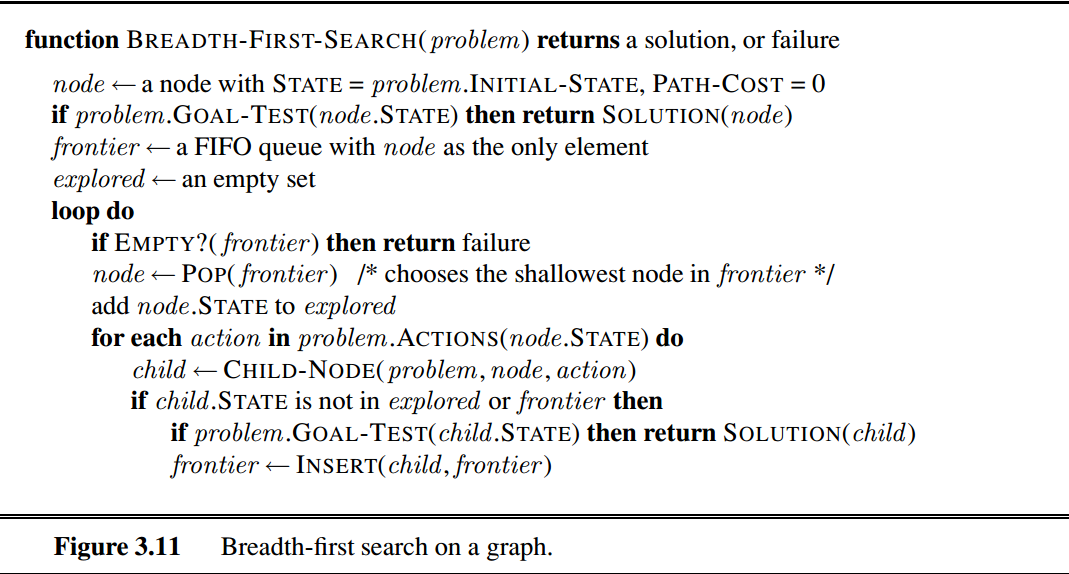

In [ ]:
def bfs(start: Node, goal: Node):
  frontier = list() #initialize the frontier using the initial state of problem
  explored = set() #initia lize the explored set to be empty

  frontier.append(start) #put คือ enqueue
  logs = []

  step = 0
  while(True): #loop do

    if len(frontier) == 0 : #if the frontier is empty then return failure
      return None, None, logs

    #choose a leaf node and remove it from the frontier
    node = frontier.pop(0) #put คือ dequeue
    logs.append(node)

    if node == goal:
      return node, get_Solution(node), logs

    explored.add(node)
    children = expand(node)

    for child in children:
      if (child not in frontier) and  (child not in explored):
        frontier.append(child)

    print('step =',step)
    print('frontier =',frontier)
    print('explored =',explored)
    step = step+1

In [ ]:

def dfs(start: Node, goal: Node):
  frontier = list() #initialize the frontier using the initial state of problem
  explored = set() #initia lize the explored set to be empty

  frontier.append(start) #put คือ enqueue
  logs = []

  step = 0
  while(True): #loop do

    if len(frontier) == 0: #if the frontier is empty then return failure
      return None, None, logs

    #choose a leaf node and remove it from the frontier
    node = frontier.pop() #put คือ dequeue
    logs.append(node)

    if node == goal:
      return node, get_Solution(node), logs

    explored.add(node)
    children = expand(node)

    for child in children:
      if (child not in frontier) and  (child not in explored):
        frontier.append(child)

    print('step =',step)
    print('frontier =',frontier)
    print('explored =',explored)
    step = step+1

In [ ]:
import heapq
def uniformcost(start: Node, goal: Node):
  frontier = list() #initialize the frontier using the initial state of problem
  frontier_cost = dict() #initialize the frontier using the initial state of problem
  explored = set() #initia lize the explored set to be empty

  heapq.heappush(frontier, (start.g, start))
  logs = []

  step = 0
  while(True): #loop do

    if len(frontier) == 0: #if the frontier is empty then return failure
      return None, None, logs

    #choose a leaf node and remove it from the frontier
    (priority, node) = frontier.pop(0) #put คือ dequeue
    #print(node)

    logs.append(node)

    if node == goal:
      return node, get_Solution(node), logs

    explored.add(node)
    children = expand(node)

    for child in children:

      if (child not in explored):

        if child in frontier_cost :
          if child.g < frontier_cost[child] :
            frontier.remove( (frontier_cost[child], child) )
            heapq.heappush(frontier, (child.g, child))
            frontier_cost[child] = child.g
            heapq.heapify(frontier)
        else:
          heapq.heappush(frontier, (child.g, child))
          frontier_cost[child] = child.g

    #print(frontier)
    print('step =',step)
    print('frontier =',frontier)
    print('explored =',explored)
    step = step+1

In [ ]:
import heapq
def greedy(start: Node, goal: Node):
  frontier = list() #initialize the frontier using the initial state of problem
  frontier_cost = dict() #initialize the frontier using the initial state of problem
  explored = set() #initia lize the explored set to be empty

  heapq.heappush(frontier, (start.g, start))
  logs = []

  step = 0
  while(True): #loop do

    if len(frontier) == 0: #if the frontier is empty then return failure
      return None, None, logs

    #choose a leaf node and remove it from the frontier
    (priority, node) = frontier.pop(0) #put คือ dequeue
    print(node)

    logs.append(node)

    if node == goal:
      return node, get_Solution(node), logs

    explored.add(node)
    children = expand(node)

    for child in children:

      if (child not in explored):

        if child in frontier_cost :
          if child.g < frontier_cost[child] :
            frontier.remove( (frontier_cost[child], child) )
            heapq.heappush(frontier, (child.h, child))
            frontier_cost[child] = child.h
            heapq.heapify(frontier)
        else:
          heapq.heappush(frontier, (child.h, child))
          frontier_cost[child] = child.h

    #print(frontier)
    print('step =',step)
    print('frontier =',frontier)
    print('explored =',explored)
    step = step+1

In [ ]:
import heapq
def A_Star(start: Node, goal: Node):
  frontier = list() #initialize the frontier using the initial state of problem
  frontier_cost = dict() #initialize the frontier using the initial state of problem
  explored = set() #initia lize the explored set to be empty

  heapq.heappush(frontier, (start.g, start))
  logs = []

  step = 0
  while(True): #loop do

    if len(frontier) == 0: #if the frontier is empty then return failure
      return None, None, logs

    #choose a leaf node and remove it from the frontier
    (priority, node) = frontier.pop(0) #put คือ dequeue
    print(node)

    logs.append(node)

    if node == goal:
      return node, get_Solution(node), logs

    explored.add(node)
    children = expand(node)

    for child in children:

      if (child not in explored):

        if child in frontier_cost :
          if child.f < frontier_cost[child] :
            frontier.remove( (frontier_cost[child], child) )
            heapq.heappush(frontier, (child.f, child))
            frontier_cost[child] = child.f
            heapq.heapify(frontier)
        else:
          heapq.heappush(frontier, (child.f, child))
          frontier_cost[child] = child.f

    #print(frontier)
    print('step =',step)
    print('frontier =',frontier)
    print('explored =',explored)
    step = step+1

In [ ]:
start_node = Node(name="Sibiu", parent=None)
goal_node  =Node(name="Urziceni", parent=None)
bfs_goal, bfs_solution, bfs_logs = bfs(start_node, goal_node)

step = 0
frontier = [('Arad', 140, 326.0981447355995, 466.0981447355995), ('Fagaras', 99, 150.04665940966495, 249.04665940966495), ('Oradea', 151, 327.5622078323444, 478.5622078323444), ('Rimnicu_Vilcea', 80, 192.60321908005588, 272.60321908005585)]
explored = {('Sibiu', 0, 0, 0)}
step = 1
frontier = [('Fagaras', 99, 150.04665940966495, 249.04665940966495), ('Oradea', 151, 327.5622078323444, 478.5622078323444), ('Rimnicu_Vilcea', 80, 192.60321908005588, 272.60321908005585), ('Timisoara', 258, 305.1245647272602, 563.1245647272601), ('Zerind', 215, 326.0705445145268, 541.0705445145268)]
explored = {('Arad', 140, 326.0981447355995, 466.0981447355995), ('Sibiu', 0, 0, 0)}
step = 2
frontier = [('Oradea', 151, 327.5622078323444, 478.5622078323444), ('Rimnicu_Vilcea', 80, 192.60321908005588, 272.60321908005585), ('Timisoara', 258, 305.1245647272602, 563.1245647272601), ('Zerind', 215, 326.0705445145268, 541.0705445145268), ('Bucharest', 310, 67.72001181334805, 377.72001181334804)]
explored = 

In [ ]:
start_node = Node(name="Sibiu", parent=None)
goal_node  =Node(name="Urziceni", parent=None)
dfs_goal, dfs_solution, dfs_logs = dfs(start_node, goal_node)

step = 0
frontier = [('Arad', 140, 326.0981447355995, 466.0981447355995), ('Fagaras', 99, 150.04665940966495, 249.04665940966495), ('Oradea', 151, 327.5622078323444, 478.5622078323444), ('Rimnicu_Vilcea', 80, 192.60321908005588, 272.60321908005585)]
explored = {('Sibiu', 0, 0, 0)}
step = 1
frontier = [('Arad', 140, 326.0981447355995, 466.0981447355995), ('Fagaras', 99, 150.04665940966495, 249.04665940966495), ('Oradea', 151, 327.5622078323444, 478.5622078323444), ('Craiova', 226, 177.7751388693031, 403.7751388693031), ('Pitesti', 177, 113.86395390991831, 290.86395390991834)]
explored = {('Rimnicu_Vilcea', 80, 192.60321908005588, 272.60321908005585), ('Sibiu', 0, 0, 0)}
step = 2
frontier = [('Arad', 140, 326.0981447355995, 466.0981447355995), ('Fagaras', 99, 150.04665940966495, 249.04665940966495), ('Oradea', 151, 327.5622078323444, 478.5622078323444), ('Craiova', 226, 177.7751388693031, 403.7751388693031), ('Bucharest', 278, 67.72001181334805, 345.72001181334804)]
explored = {('Rimnicu

In [ ]:
start_node = Node(name="Sibiu", parent=None)
goal_node  =Node(name="Urziceni", parent=None)
uc_goal, uc_solution, uc_logs = uniformcost(start_node, goal_node)

step = 0
frontier = [(80, ('Rimnicu_Vilcea', 80, 192.60321908005588, 272.60321908005585)), (99, ('Fagaras', 99, 150.04665940966495, 249.04665940966495)), (151, ('Oradea', 151, 327.5622078323444, 478.5622078323444)), (140, ('Arad', 140, 326.0981447355995, 466.0981447355995))]
explored = {('Sibiu', 0, 0, 0)}
step = 1
frontier = [(99, ('Fagaras', 99, 150.04665940966495, 249.04665940966495)), (151, ('Oradea', 151, 327.5622078323444, 478.5622078323444)), (140, ('Arad', 140, 326.0981447355995, 466.0981447355995)), (226, ('Craiova', 226, 177.7751388693031, 403.7751388693031)), (177, ('Pitesti', 177, 113.86395390991831, 290.86395390991834))]
explored = {('Rimnicu_Vilcea', 80, 192.60321908005588, 272.60321908005585), ('Sibiu', 0, 0, 0)}
step = 2
frontier = [(151, ('Oradea', 151, 327.5622078323444, 478.5622078323444)), (140, ('Arad', 140, 326.0981447355995, 466.0981447355995)), (226, ('Craiova', 226, 177.7751388693031, 403.7751388693031)), (177, ('Pitesti', 177, 113.86395390991831, 290.863953909

In [ ]:
start_node = Node(name="Sibiu", parent=None)
goal_node  =Node(name="Urziceni", parent=None)
greedy_goal, greedy_solution, greedy_ogs = greedy(start_node, goal_node)

('Sibiu', 0, 0, 0)
step = 0
frontier = [(150.04665940966495, ('Fagaras', 99, 150.04665940966495, 249.04665940966495)), (192.60321908005588, ('Rimnicu_Vilcea', 80, 192.60321908005588, 272.60321908005585)), (327.5622078323444, ('Oradea', 151, 327.5622078323444, 478.5622078323444)), (326.0981447355995, ('Arad', 140, 326.0981447355995, 466.0981447355995))]
explored = {('Sibiu', 0, 0, 0)}
('Fagaras', 99, 150.04665940966495, 249.04665940966495)
step = 1
frontier = [(67.72001181334805, ('Bucharest', 310, 67.72001181334805, 377.72001181334804)), (192.60321908005588, ('Rimnicu_Vilcea', 80, 192.60321908005588, 272.60321908005585)), (326.0981447355995, ('Arad', 140, 326.0981447355995, 466.0981447355995)), (327.5622078323444, ('Oradea', 151, 327.5622078323444, 478.5622078323444))]
explored = {('Fagaras', 99, 150.04665940966495, 249.04665940966495), ('Sibiu', 0, 0, 0)}
('Bucharest', 310, 67.72001181334805, 377.72001181334804)
step = 2
frontier = [(0.0, ('Urziceni', 395, 0.0, 395.0)), (113.863953909

In [ ]:
start_node = Node(name="Sibiu", parent=None)
goal_node  =Node(name="Urziceni", parent=None)
as_goal, as_solution, as_logs = A_Star(start_node, goal_node)

('Sibiu', 0, 0, 0)
step = 0
frontier = [(249.04665940966495, ('Fagaras', 99, 150.04665940966495, 249.04665940966495)), (272.60321908005585, ('Rimnicu_Vilcea', 80, 192.60321908005588, 272.60321908005585)), (478.5622078323444, ('Oradea', 151, 327.5622078323444, 478.5622078323444)), (466.0981447355995, ('Arad', 140, 326.0981447355995, 466.0981447355995))]
explored = {('Sibiu', 0, 0, 0)}
('Fagaras', 99, 150.04665940966495, 249.04665940966495)
step = 1
frontier = [(272.60321908005585, ('Rimnicu_Vilcea', 80, 192.60321908005588, 272.60321908005585)), (377.72001181334804, ('Bucharest', 310, 67.72001181334805, 377.72001181334804)), (466.0981447355995, ('Arad', 140, 326.0981447355995, 466.0981447355995)), (478.5622078323444, ('Oradea', 151, 327.5622078323444, 478.5622078323444))]
explored = {('Fagaras', 99, 150.04665940966495, 249.04665940966495), ('Sibiu', 0, 0, 0)}
('Rimnicu_Vilcea', 80, 192.60321908005588, 272.60321908005585)
step = 2
frontier = [(290.86395390991834, ('Pitesti', 177, 113.8639

In [ ]:
#